## packages

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import scipy.io as sio
import datetime as dtz
import gsw
import matplotlib.dates as mdates
import matplotlib.ticker as tick
import matplotlib.cm as cm
from matplotlib.gridspec import GridSpec
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## importar datos

In [2]:
prof1 = sio.loadmat("data/018517_20120217_1505_data.mat")
RBR = prof1["RBR"]
datetime = prof1['datetime']
datos = prof1['datos']
names = prof1['names']
units = prof1['units']

In [3]:
names2 = np.empty(9, dtype=object)
for i in range(0,9):
    names2[i] = names[i][0][0]

datetime2 = np.empty(len(datetime), dtype='U25')
for i in range(0,len(datetime)):
    datetime2[i] = datetime[i][0][0]


In [4]:
data = pd.DataFrame(datos, index=pd.to_datetime(datetime2, format='%Y-%m-%d %H:%M:%S'), columns=names2)
data

,Conductivity,Temperature,Pressure,Turbidity,Depth,Salinity,Specific Conductivity,Density Anomaly,Speed of sound
2012-02-16 06:30:01.000,-0.005841,16.008554,10.151100,161.168117,0.018449,0.000000,-7.051521,-1.056957,1469.595396
2012-02-16 06:30:01.167,-0.003883,16.009109,10.150142,161.111643,0.017499,0.000000,-4.688496,-1.057051,1469.597273
2012-02-16 06:30:01.334,-0.005303,16.009539,10.150271,161.088813,0.017627,0.000000,-6.401840,-1.057121,1469.598743
2012-02-16 06:30:01.501,-0.006137,16.009876,10.149626,161.076797,0.016987,0.000000,-7.409659,-1.057178,1469.599882
2012-02-16 06:30:01.667,-0.007167,16.010389,10.150161,161.047960,0.017517,0.000000,-8.652595,-1.057259,1469.601641
...,...,...,...,...,...,...,...,...,...
2012-02-16 15:59:48.500,0.005448,12.603267,10.279747,146.088420,0.146047,0.008388,7.138048,-0.564619,1457.466029
2012-02-16 15:59:48.667,0.002118,12.603412,10.278872,146.076404,0.145179,0.006964,2.775025,-0.565756,1457.464788
2012-02-16 15:59:48.833,0.003157,12.603334,10.278844,146.080009,0.145151,0.007371,4.136191,-0.565428,1457.465003
2012-02-16 15:59:49.000,-0.004588,12.603682,10.279978,146.070396,0.146275,0.000000,-6.011694,-0.571238,1457.457153


In [5]:
data.index = data.index + dtz.timedelta(hours=3) # OJO: correr una sola vez

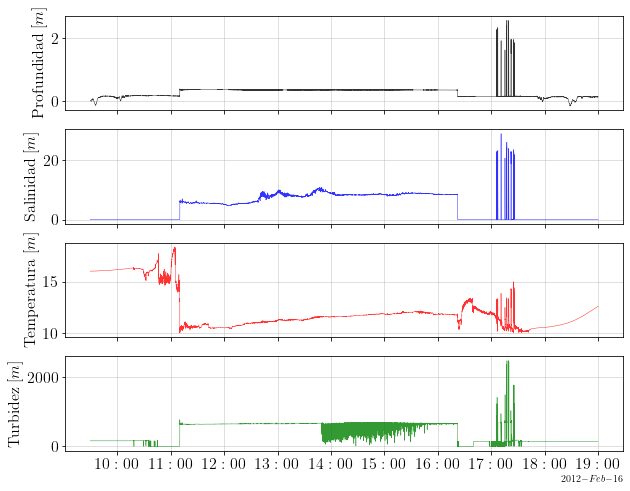

In [6]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(10, 8), sharex=True)

#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax1.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=16)

ax1.plot(data.index, data['Depth'].values, c='k', alpha=0.8, linewidth=0.5)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
ax1.grid(alpha=0.5)

ax2.set_ylabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=16)

ax2.plot(data.index, data['Salinity'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)
ax2.grid(alpha=0.5)

ax3.set_ylabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=16)

ax3.plot(data.index, data['Temperature'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=16)
ax3.yaxis.set_tick_params(labelsize=16)
ax3.grid(alpha=0.5)

ax4.set_ylabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=16)

ax4.plot(data.index, data['Turbidity'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=16)
ax4.yaxis.set_tick_params(labelsize=16)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

In [7]:
data_cut = data.loc[dtz.datetime(2012,2,16,8,10,0):dtz.datetime(2012,2,16,13,25,0)]

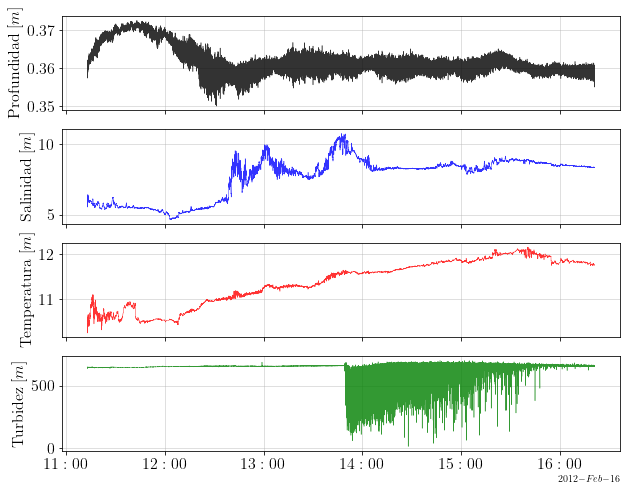

In [8]:
data_cut = data.iloc[37000:148000]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(10, 8), sharex=True)

#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax1.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=16)

ax1.plot(data_cut.index, data_cut['Depth'].values, c='k', alpha=0.8, linewidth=0.5)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
ax1.grid(alpha=0.5)

ax2.set_ylabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=16)

ax2.plot(data_cut.index, data_cut['Salinity'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)
ax2.grid(alpha=0.5)

ax3.set_ylabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=16)

ax3.plot(data_cut.index, data_cut['Temperature'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=16)
ax3.yaxis.set_tick_params(labelsize=16)
ax3.grid(alpha=0.5)

ax4.set_ylabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=16)

ax4.plot(data_cut.index, data_cut['Turbidity'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=16)
ax4.yaxis.set_tick_params(labelsize=16)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

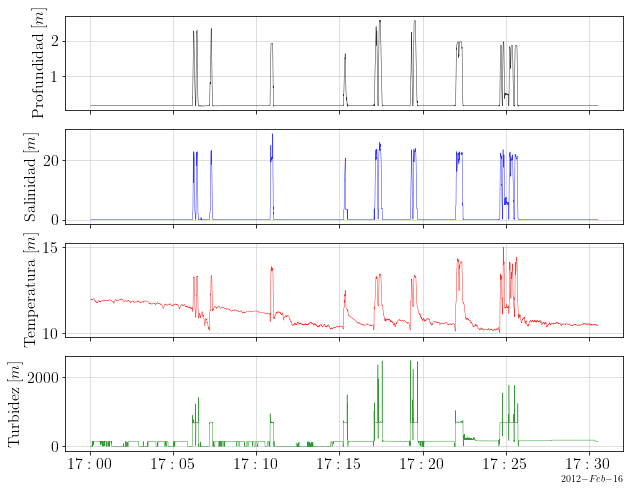

In [9]:
data_cut = data.iloc[162000:173000]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(10, 8), sharex=True)

#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax1.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=16)

ax1.plot(data_cut.index, data_cut['Depth'].values, c='k', alpha=0.8, linewidth=0.5)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
ax1.grid(alpha=0.5)

ax2.set_ylabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=16)

ax2.plot(data_cut.index, data_cut['Salinity'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)
ax2.grid(alpha=0.5)

ax3.set_ylabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=16)

ax3.plot(data_cut.index, data_cut['Temperature'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=16)
ax3.yaxis.set_tick_params(labelsize=16)
ax3.grid(alpha=0.5)

ax4.set_ylabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=16)

ax4.plot(data_cut.index, data_cut['Turbidity'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=16)
ax4.yaxis.set_tick_params(labelsize=16)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

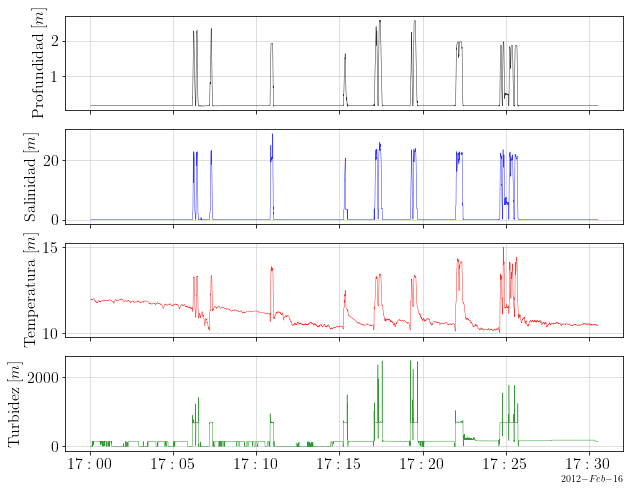

In [10]:
data_cut = data.iloc[162000:173000]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(10, 8), sharex=True)

#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax1.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=16)

ax1.plot(data_cut.index, data_cut['Depth'].values, c='k', alpha=0.8, linewidth=0.5)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
ax1.grid(alpha=0.5)

ax2.set_ylabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=16)

ax2.plot(data_cut.index, data_cut['Salinity'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)
ax2.grid(alpha=0.5)

ax3.set_ylabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=16)

ax3.plot(data_cut.index, data_cut['Temperature'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=16)
ax3.yaxis.set_tick_params(labelsize=16)
ax3.grid(alpha=0.5)

ax4.set_ylabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=16)

ax4.plot(data_cut.index, data_cut['Turbidity'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=16)
ax4.yaxis.set_tick_params(labelsize=16)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

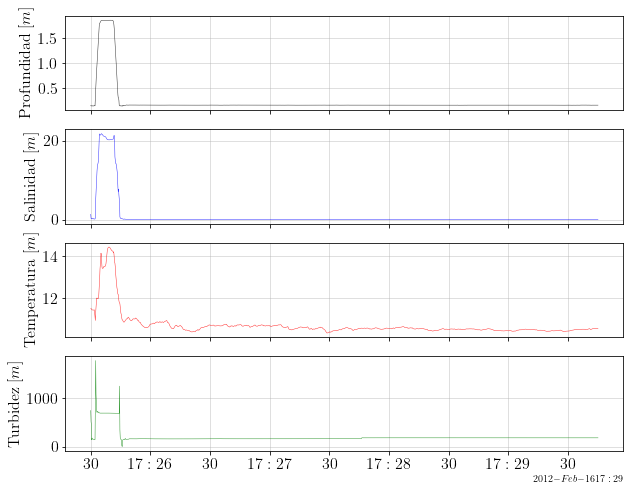

In [126]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,25,30):dtz.datetime(2012,2,16,17,29,45)]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(10, 8), sharex=True)

#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax1.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=16)

ax1.plot(data_cut.index, data_cut['Depth'].values, c='k', alpha=0.8, linewidth=0.5)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
ax1.grid(alpha=0.5)

ax2.set_ylabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=16)

ax2.plot(data_cut.index, data_cut['Salinity'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)
ax2.grid(alpha=0.5)

ax3.set_ylabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=16)

ax3.plot(data_cut.index, data_cut['Temperature'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=16)
ax3.yaxis.set_tick_params(labelsize=16)
ax3.grid(alpha=0.5)

ax4.set_ylabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=16)

ax4.plot(data_cut.index, data_cut['Turbidity'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=16)
ax4.yaxis.set_tick_params(labelsize=16)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

## Perfiles

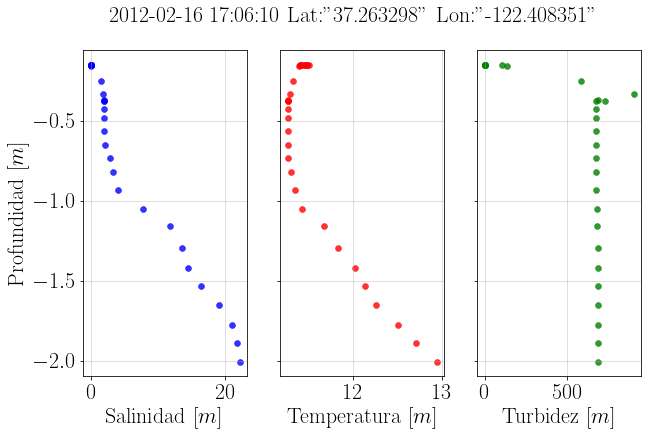

In [12]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,6,7):dtz.datetime(2012,2,16,17,6,12)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:06:10 Lat:"37.263298" Lon:"-122.408351"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

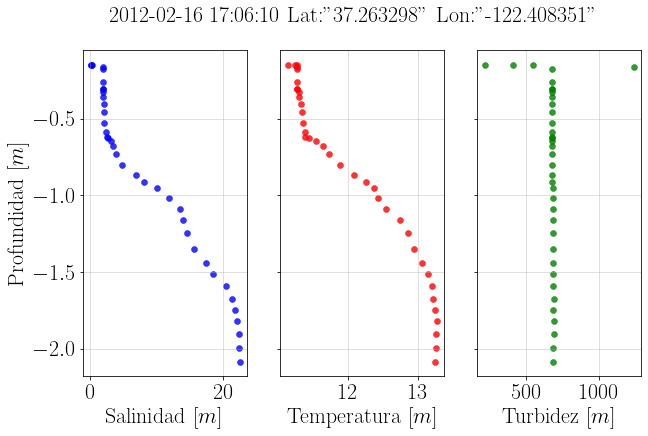

In [16]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,6,14):dtz.datetime(2012,2,16,17,6,20)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:06:10 Lat:"37.263298" Lon:"-122.408351"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

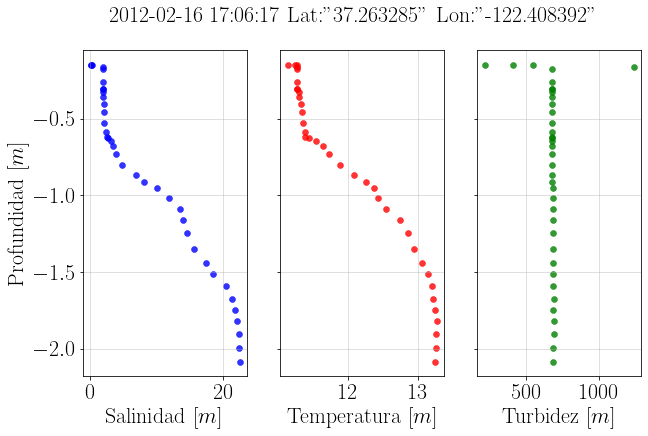

In [17]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,6,14):dtz.datetime(2012,2,16,17,6,20)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:06:17 Lat:"37.263285" Lon:"-122.408392"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

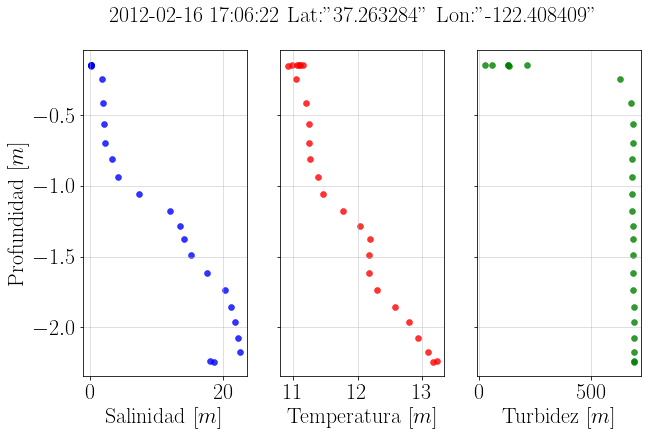

In [21]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,6,20):dtz.datetime(2012,2,16,17,6,24)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:06:22 Lat:"37.263284" Lon:"-122.408409"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

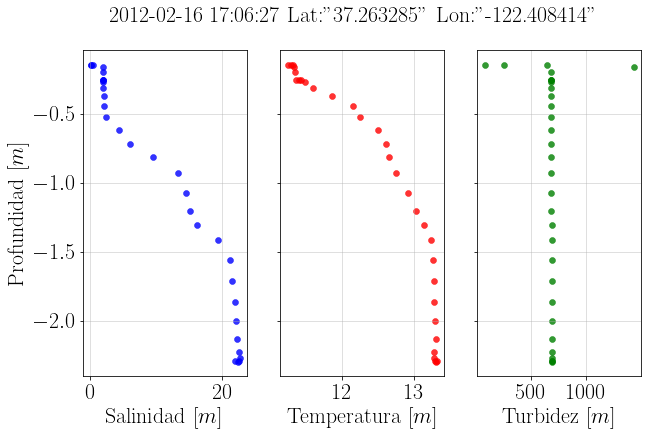

In [24]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,6,25):dtz.datetime(2012,2,16,17,6,30)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:06:27 Lat:"37.263285" Lon:"-122.408414"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

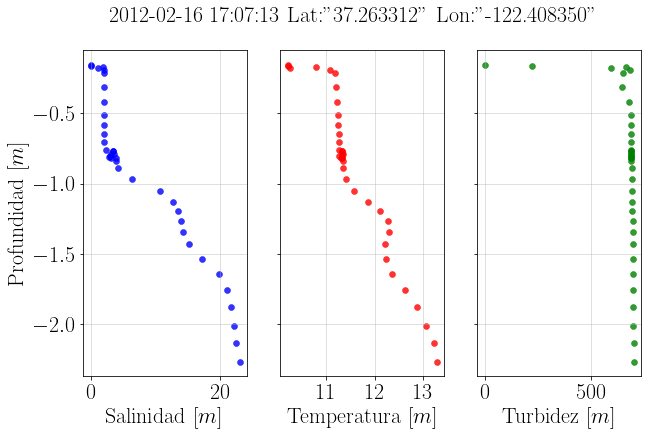

In [29]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,7,10):dtz.datetime(2012,2,16,17,7,16)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:07:13 Lat:"37.263312" Lon:"-122.408350"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

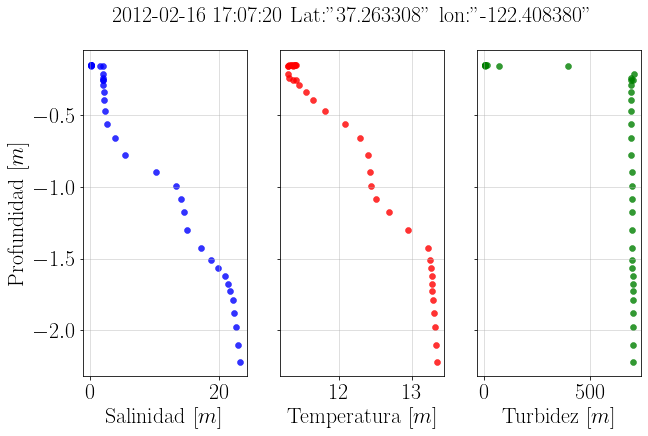

In [31]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,7,17):dtz.datetime(2012,2,16,17,7,23)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:07:20 Lat:"37.263308" lon:"-122.408380"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

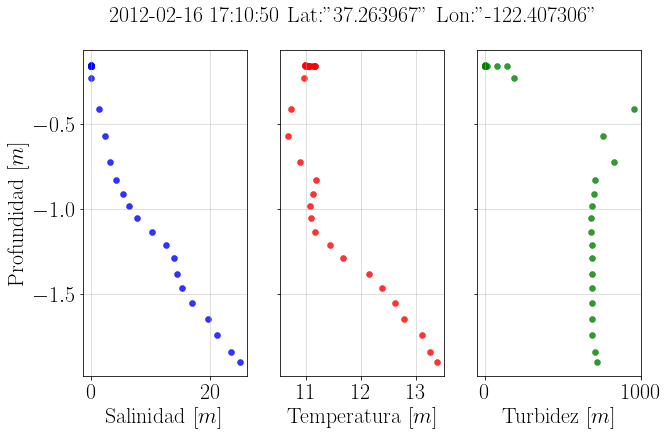

In [38]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,10,47):dtz.datetime(2012,2,16,17,10,52)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:10:50 Lat:"37.263967" Lon:"-122.407306"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

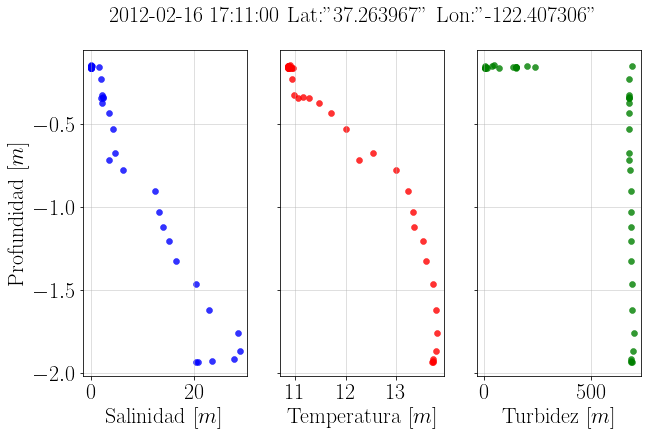

In [42]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,10,58):dtz.datetime(2012,2,16,17,11,5)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:11:00 Lat:"37.263967" Lon:"-122.407306"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

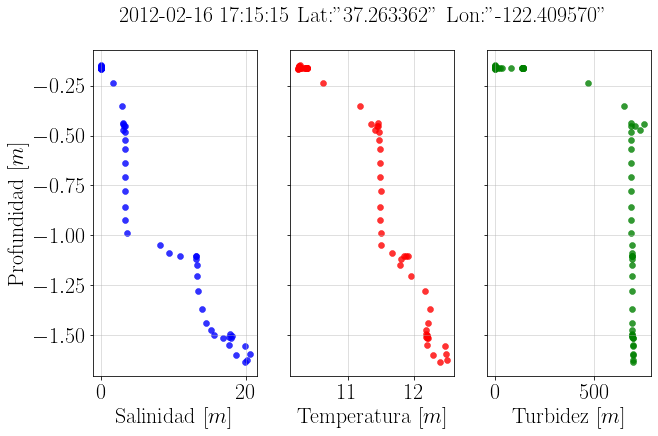

In [49]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,15,10):dtz.datetime(2012,2,16,17,15,21)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:15:15 Lat:"37.263362" Lon:"-122.409570"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

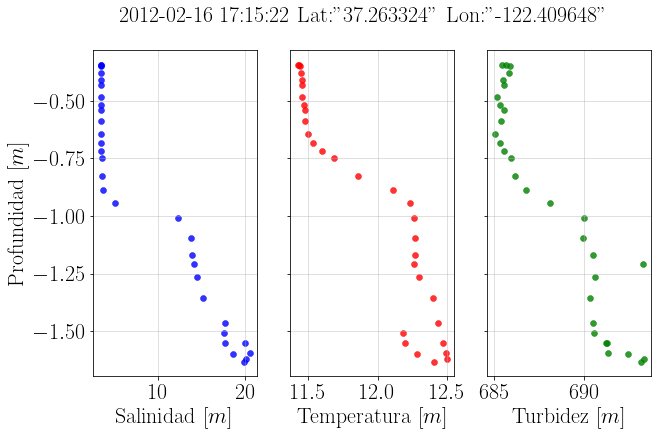

In [51]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,15,20):dtz.datetime(2012,2,16,17,15,25)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:15:22 Lat:"37.263324" Lon:"-122.409648"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

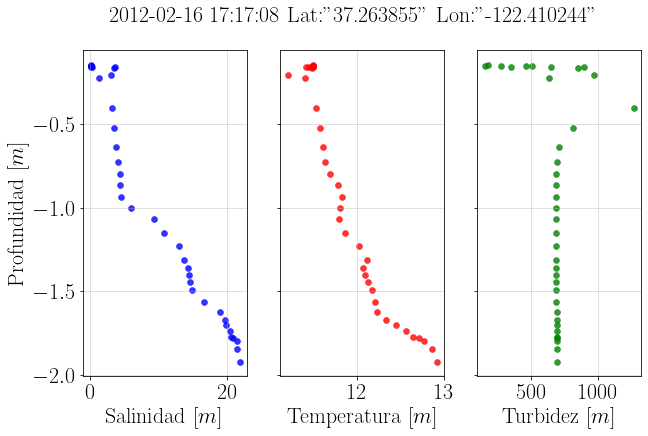

In [58]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,17,5):dtz.datetime(2012,2,16,17,17,11)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:17:08 Lat:"37.263855" Lon:"-122.410244"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

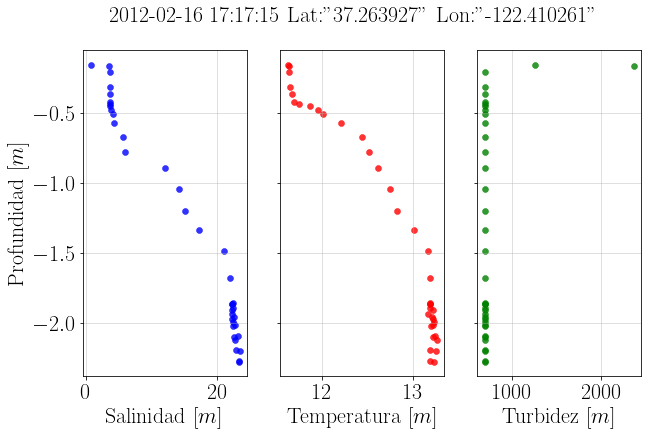

In [62]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,17,13):dtz.datetime(2012,2,16,17,17,19)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:17:15 Lat:"37.263927" Lon:"-122.410261"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

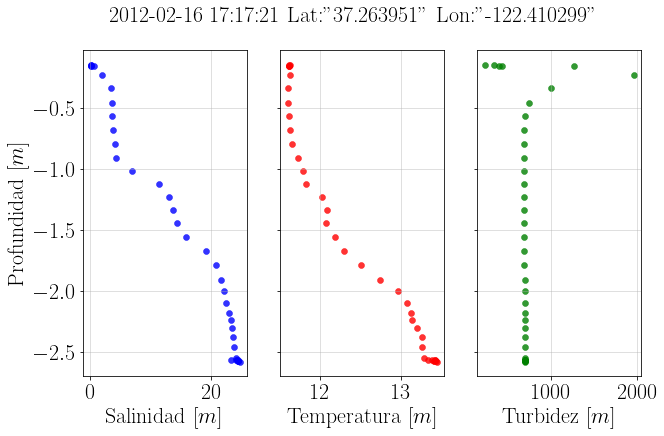

In [66]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,17,19):dtz.datetime(2012,2,16,17,17,25)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:17:21 Lat:"37.263951" Lon:"-122.410299"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

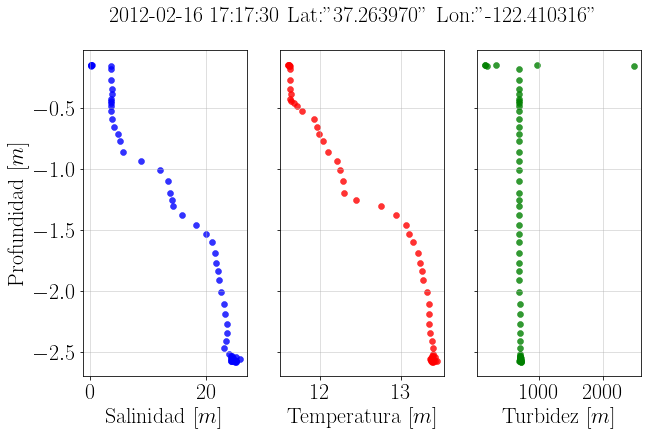

In [68]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,17,25):dtz.datetime(2012,2,16,17,17,35)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:17:30 Lat:"37.263970" Lon:"-122.410316"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

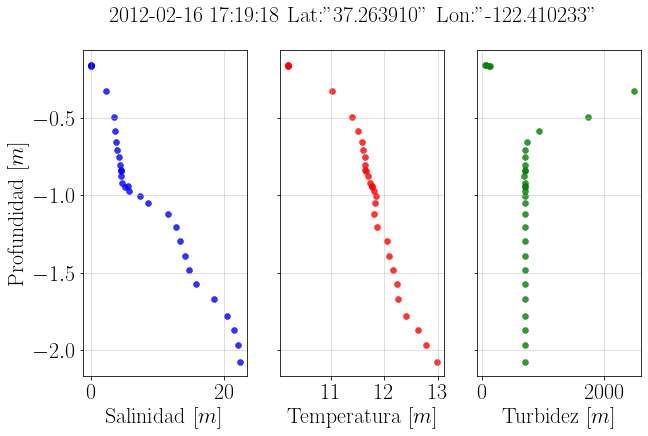

In [73]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,19,15):dtz.datetime(2012,2,16,17,19,20)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:19:18 Lat:"37.263910" Lon:"-122.410233"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

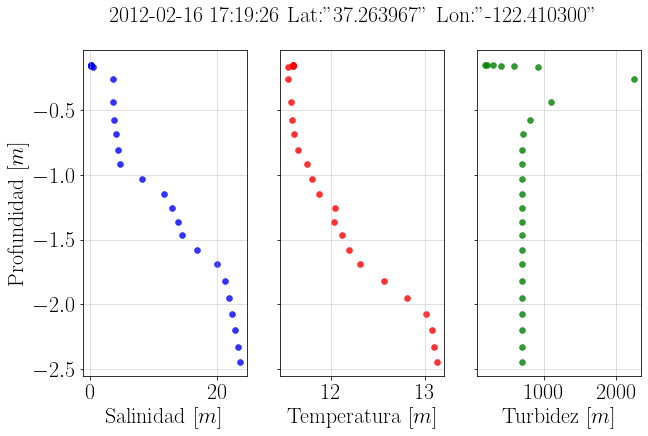

In [79]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,19,25):dtz.datetime(2012,2,16,17,19,29)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:19:26 Lat:"37.263967" Lon:"-122.410300"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

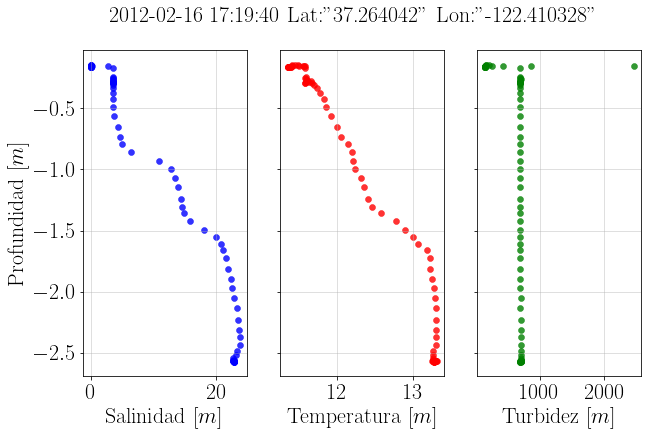

In [82]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,19,31):dtz.datetime(2012,2,16,17,19,45)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:19:40 Lat:"37.264042" Lon:"-122.410328"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

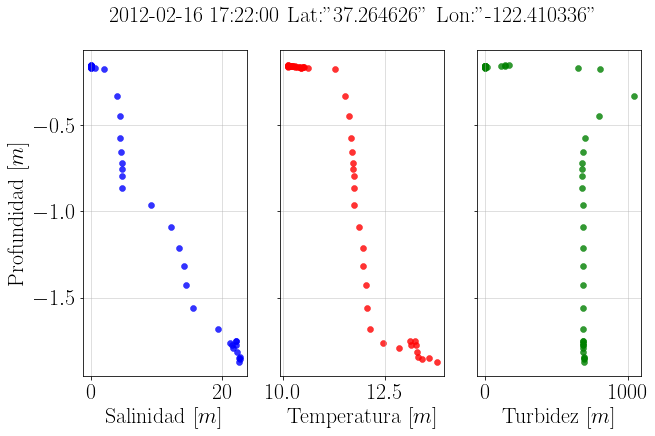

In [92]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,21,55):dtz.datetime(2012,2,16,17,22,4)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:22:00 Lat:"37.264626" Lon:"-122.410336"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

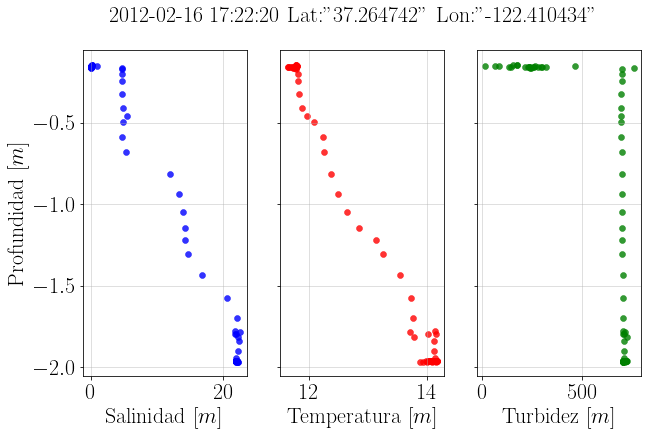

In [93]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,22,15):dtz.datetime(2012,2,16,17,22,30)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:22:20 Lat:"37.264742" Lon:"-122.410434"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

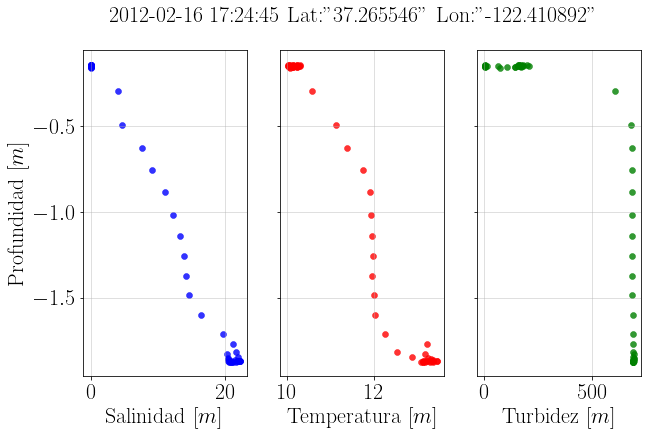

In [99]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,24,35):dtz.datetime(2012,2,16,17,24,45)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:24:45 Lat:"37.265546" Lon:"-122.410892"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

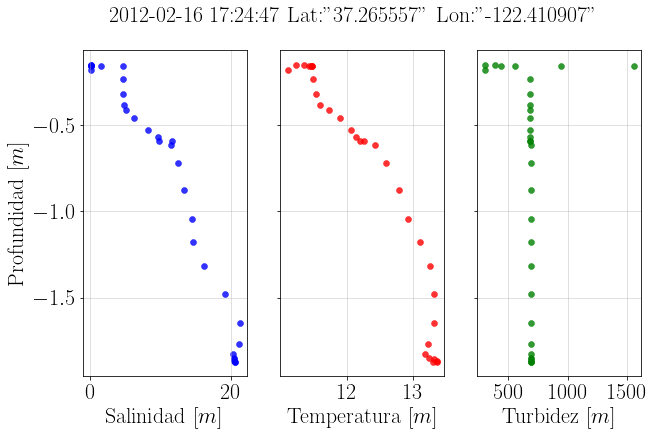

In [103]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,24,44):dtz.datetime(2012,2,16,17,24,49)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:24:47 Lat:"37.265557" Lon:"-122.410907"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

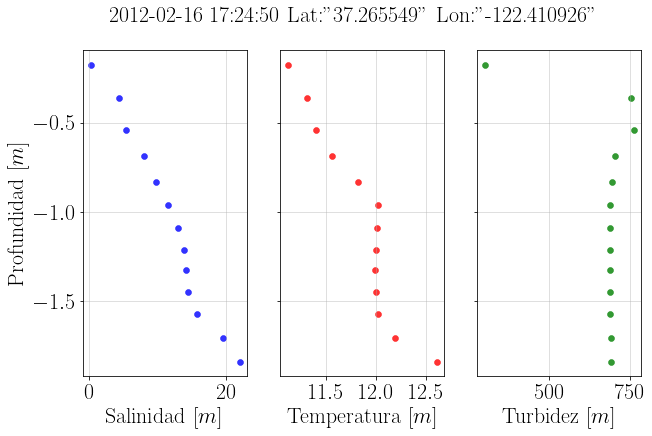

In [107]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,24,49):dtz.datetime(2012,2,16,17,24,51)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:24:50 Lat:"37.265549" Lon:"-122.410926"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

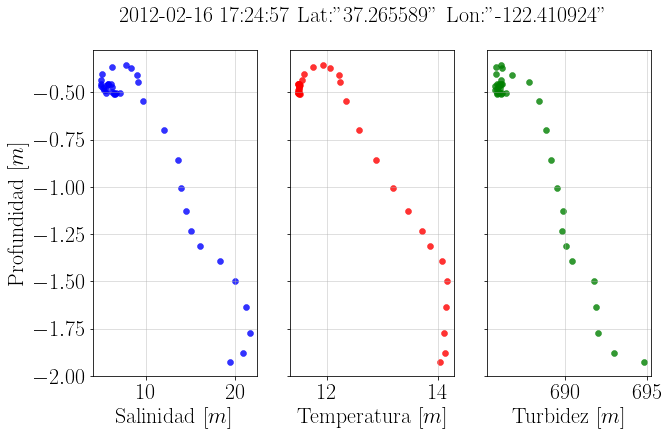

In [115]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,24,54):dtz.datetime(2012,2,16,17,25,0)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:24:57 Lat:"37.265589" Lon:"-122.410924"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

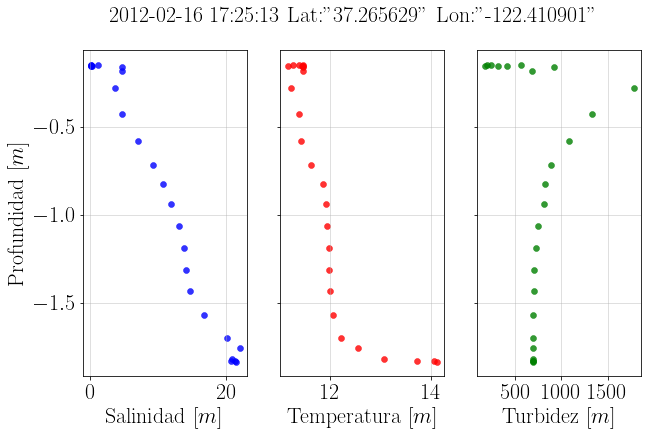

In [118]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,25,11):dtz.datetime(2012,2,16,17,25,15)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:25:13 Lat:"37.265629" Lon:"-122.410901"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

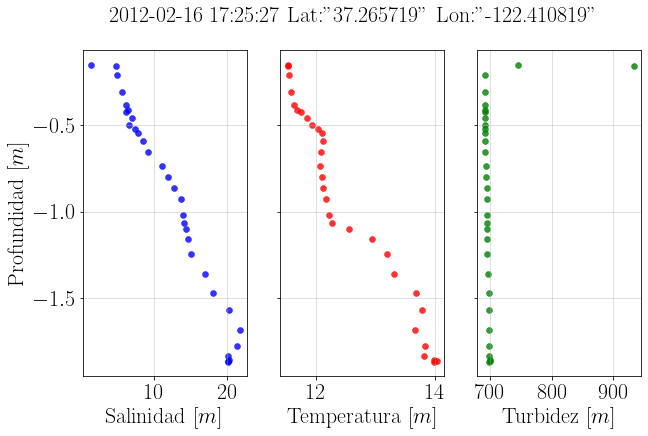

In [121]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,25,25):dtz.datetime(2012,2,16,17,25,30)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:25:27 Lat:"37.265719" Lon:"-122.410819"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

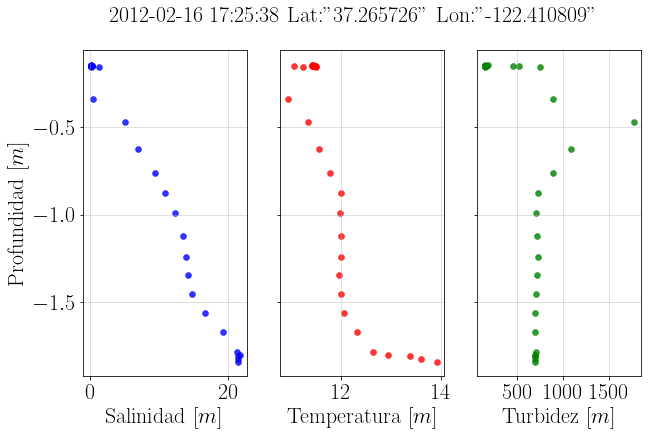

In [123]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,25,30):dtz.datetime(2012,2,16,17,25,35)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:25:38 Lat:"37.265726" Lon:"-122.410809"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

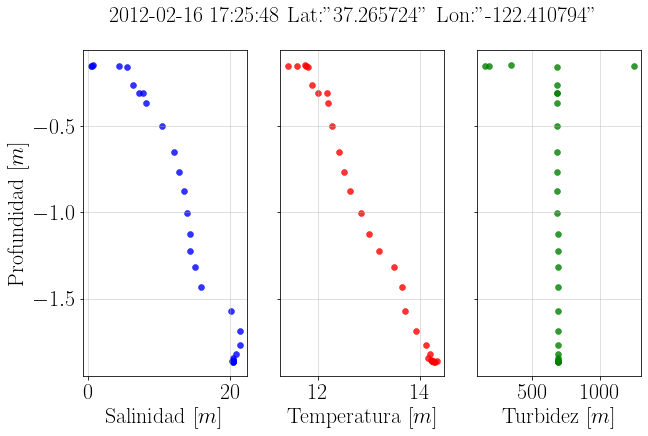

In [124]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,25,40):dtz.datetime(2012,2,16,17,25,45)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:25:48 Lat:"37.265724" Lon:"-122.410794"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

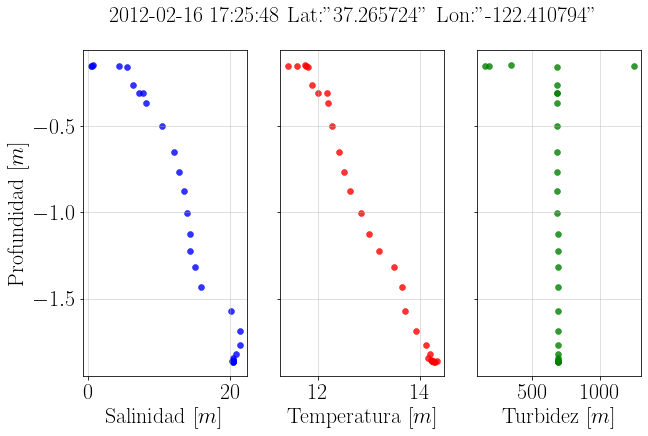

In [124]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,25,40):dtz.datetime(2012,2,16,17,25,45)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:25:48 Lat:"37.265724" Lon:"-122.410794"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)